In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
smol_135M = pd.read_csv('data_SmolLM2-135M-Instruct_Samsum.csv')
smol_360M = pd.read_csv('data_SmolLM2-360M-Instruct_Samsum.csv')
smol_1_7b = pd.read_csv('data_SmolLM2-1.7B-Instruct_Samsum.csv')
qwen_0_5b = pd.read_csv('data_Qwen2.5-0.5B-Instruct_Samsum.csv')
qwen_1_5b = pd.read_csv('data_Qwen2.5-1.5B-Instruct_Samsum.csv')
qwen_3b = pd.read_csv('data_Qwen2.5-3B-Instruct_Samsum.csv')
opt_125m = pd.read_csv('data_facebook_opt-125m_Samsum.csv')
opt_350m = pd.read_csv('data_facebook_opt-350m_Samsum.csv')
opt_1_3b = pd.read_csv('data_facebook_opt-1.3b_Samsum.csv')
opt_2_7b = pd.read_csv('data_facebook_opt-2.7b_Samsum.csv')
gpt_neo_125m = pd.read_csv('data_EleutherAI_gpt-neo-125m_Samsum.csv')
gpt_neo_1_3b = pd.read_csv('data_EleutherAI_gpt-neo-1.3B_Samsum.csv')
gpt_neo_2_7b = pd.read_csv('data_EleutherAI_gpt-neo-2.7B_Samsum.csv')

models = [
          'Qwen2.5-0.5B', 'Qwen2.5-1.5B', 'Qwen2.5-3B',
         'opt-125M', 'opt-350M', 'opt-1.3B', 'opt-2.7B',
         'gpt-neo-125M', 'gpt-neo-1.3B', 'gpt-neo-2.5B']
smol_models = ['SmolLM2-135M', 'SmolLM2-360M', 'SmolLM2-1.7B']
smol_135M.columns

Index(['Unnamed: 0', 'Model', 'Task_Prefix', 'Dataset_Name', 'Model_Responses',
       'Gold_Labels', 'cos_sim_scores', 'rouge1_precision', 'rouge1_recall',
       'rouge1_f1', 'rouge2_precision', 'rouge2_recall', 'rouge2_f1',
       'rougeL_precision', 'rougeL_recall', 'rougeL_f1', 'Min_10.0%_Prob',
       'Min_20.0%_Prob', 'Min_30.0%_Prob', 'Min_40.0%_Prob', 'Min_50.0%_Prob'],
      dtype='object')

In [74]:
min_k_prob = ['Min_10.0%_Prob', 'Min_20.0%_Prob', 'Min_30.0%_Prob', 'Min_40.0%_Prob', 'Min_50.0%_Prob']
rouge_scores = ['rouge1_precision', 'rouge1_recall',
       'rouge1_f1', 'rouge2_precision', 'rouge2_recall', 'rouge2_f1',
       'rougeL_precision', 'rougeL_recall', 'rougeL_f1']

model_results_list = [qwen_0_5b, qwen_1_5b, qwen_3b, 
                     opt_125m, opt_350m, opt_1_3b, opt_2_7b, gpt_neo_125m, gpt_neo_1_3b, gpt_neo_2_7b]
smol_list = [smol_135M, smol_360M, smol_1_7b]

avg_min_k_prob = dict()
std_min_k_prob = dict()
for k in min_k_prob:
    avg_min_k_prob[k] = [result[k].mean() for result in model_results_list]
    std_min_k_prob[k] = [result[k].std() for result in model_results_list]

avg_rouge_scores = dict()
std_rouge_scores = dict()
for type in rouge_scores:
    avg_rouge_scores[type] = [result[type].mean() for result in model_results_list]
    std_rouge_scores[type] = [result[type].std() for result in model_results_list]


In [84]:
avg_min_k_prob_smollm = dict()
std_min_k_prob_smollm = dict()
for k in min_k_prob:
    avg_min_k_prob_smollm[k] = [result[k].mean() for result in smol_list]
    std_min_k_prob_smollm[k] = [result[k].std() for result in smol_list]

avg_rouge_scores_smollm = dict()
std_rouge_scores_smollm = dict()
for type in rouge_scores:
    avg_rouge_scores_smollm[type] = [result[type].mean() for result in smol_list]
    std_rouge_scores_smollm[type] = [result[type].std() for result in smol_list]


In [85]:

min_k_metrics = [avg_min_k_prob[k] for k in min_k_prob]
rouge_metrics = [avg_rouge_scores[type] for type in rouge_scores]
cosine_metrics = [model['cos_sim_scores'].mean() for model in model_results_list]

min_k_metrics_smollm = [avg_min_k_prob_smollm[k] for k in min_k_prob]
rouge_metrics_smollm = [avg_rouge_scores_smollm[type] for type in rouge_scores]
cosine_metrics_smollm = [model['cos_sim_scores'].mean() for model in smol_list]

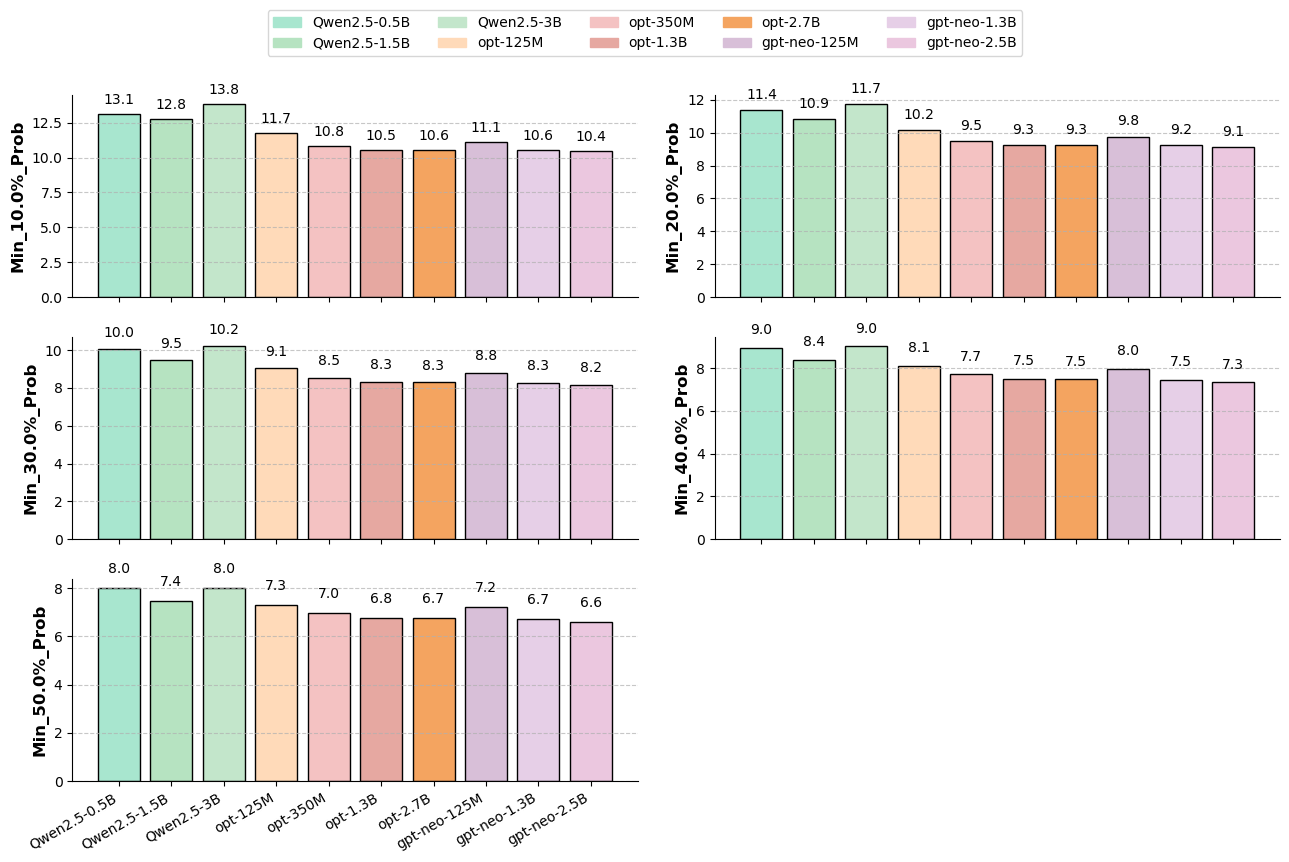

In [81]:
import numpy as np
import matplotlib.patches as mpatches

# Define different colors for each subplot
colors = [
    "#A8E6CF", "#B6E3C1", "#C3E6CB",  # Family 2 - Soft Greens
    "#FFDAB9", "#F4C2C2", "#E6A8A1", "#F4A460",  # Family 3 - Soft Oranges/Pinks
    "#D8BFD8", "#E6CFE7", "#EBC7DF"   # Family 4 - Soft Purples
]
smol_colors = [ "#AEC6CF", "#B4D2E7", "#CFE2F3"]
rows = 3  # Define number of rows
cols = (len(min_k_prob) + 1) // rows  # Automatically determine number of columns

# Create subplots with two rows
fig, axes = plt.subplots(rows, cols, figsize=(13, 8), sharex=True)
axes = axes.flatten()  # Flatten axes for easy iteration
                        
# Plot each metric in a separate subplot
for i, ax in enumerate(axes):
    if i < len(min_k_prob):
        bars = ax.bar(models, min_k_metrics[i], color=colors, edgecolor="black")

        # Add labels above bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', 
                    ha='center', va='bottom', fontsize=10, color='black')

        # Formatting
        ax.set_ylabel(min_k_prob[i], fontsize=12, weight="bold")
        #ax.set_title(f"Model Comparison - {min_k_prob[i]}", fontsize=14, weight="bold")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.yaxis.grid(True, linestyle="--", alpha=0.7)
        
        # Set x-axis labels individually
        ax.set_xticks(np.arange(len(models)))
        ax.set_xticklabels(models, rotation=30, ha="right")
    else:
        ax.set_visible(False)  # Hide extra subplots if not needed

# Add a legend for model colors
legend_patches = [mpatches.Patch(color=colors[i], label=models[i]) for i in range(len(models))]
fig.legend(handles=legend_patches, loc="upper center", bbox_to_anchor=(0.5, 1.08),
           ncol=min(len(models) // 2, 6), fontsize=10)

fig.subplots_adjust(top=0.85)
plt.tight_layout()
plt.savefig("Min_K_prob.png", dpi=300, bbox_inches='tight')
plt.show()

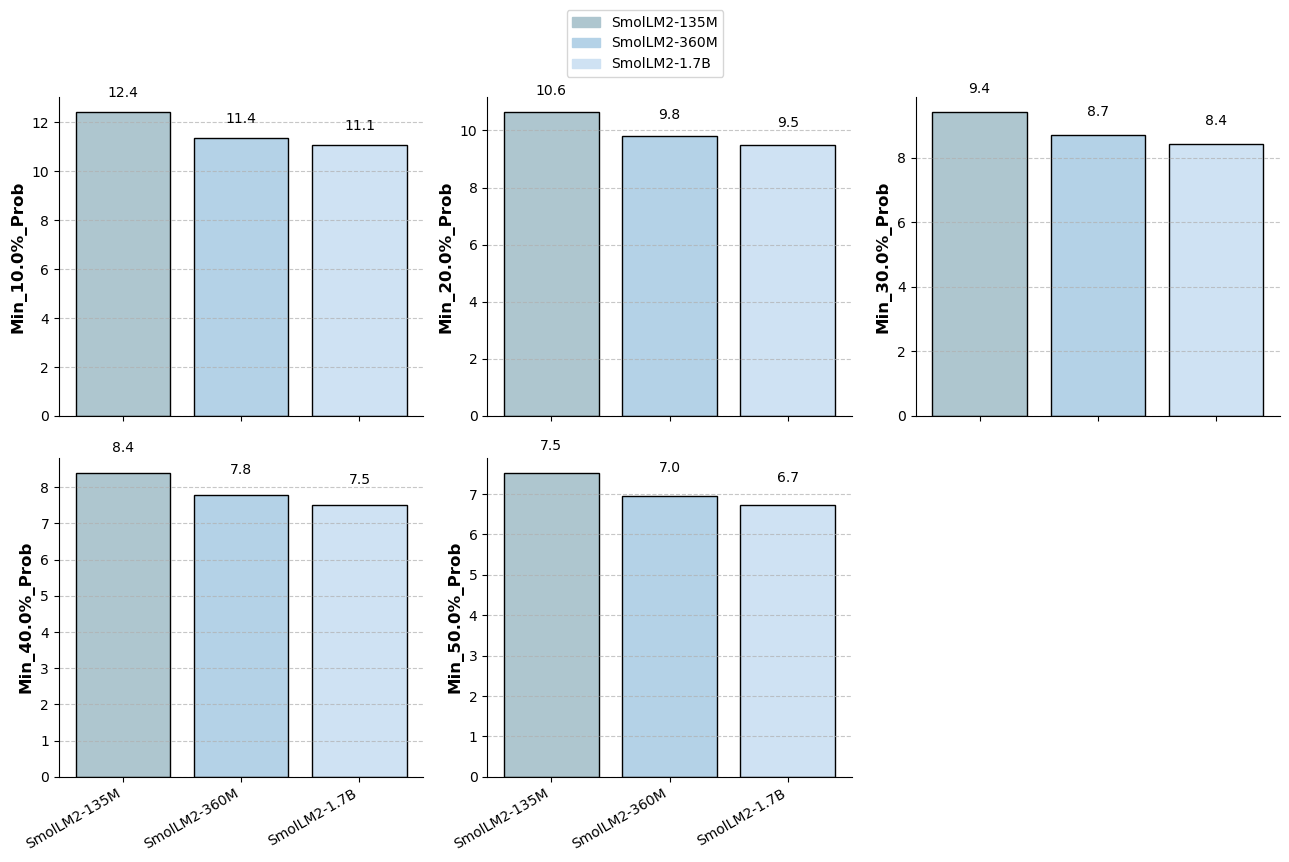

In [88]:
rows = 2 # Define number of rows
cols = (len(min_k_prob) + 1) // rows  # Automatically determine number of columns

# Create subplots with two rows
fig, axes = plt.subplots(rows, cols, figsize=(13, 8), sharex=True)
axes = axes.flatten()  # Flatten axes for easy iteration
                        
# Plot each metric in a separate subplot
for i, ax in enumerate(axes):
    if i < len(min_k_prob):
        bars = ax.bar(smol_models, min_k_metrics_smollm[i], color=smol_colors, edgecolor="black")

        # Add labels above bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', 
                    ha='center', va='bottom', fontsize=10, color='black')

        # Formatting
        ax.set_ylabel(min_k_prob[i], fontsize=12, weight="bold")
        #ax.set_title(f"Model Comparison - {min_k_prob[i]}", fontsize=14, weight="bold")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.yaxis.grid(True, linestyle="--", alpha=0.7)
        
        # Set x-axis labels individually
        ax.set_xticks(np.arange(len(smol_models)))
        ax.set_xticklabels(smol_models, rotation=30, ha="right")
    else:
        ax.set_visible(False)  # Hide extra subplots if not needed

# Add a legend for model colors
legend_patches = [mpatches.Patch(color=smol_colors[i], label=smol_models[i]) for i in range(len(smol_models))]
fig.legend(handles=legend_patches, loc="upper center", bbox_to_anchor=(0.5, 1.08),
           ncol=min(len(smol_models) // 2, 6), fontsize=10)

fig.subplots_adjust(top=0.85)
plt.tight_layout()
plt.savefig("SmolLM2_Min_K_prob.png", dpi=300, bbox_inches='tight')
plt.show()

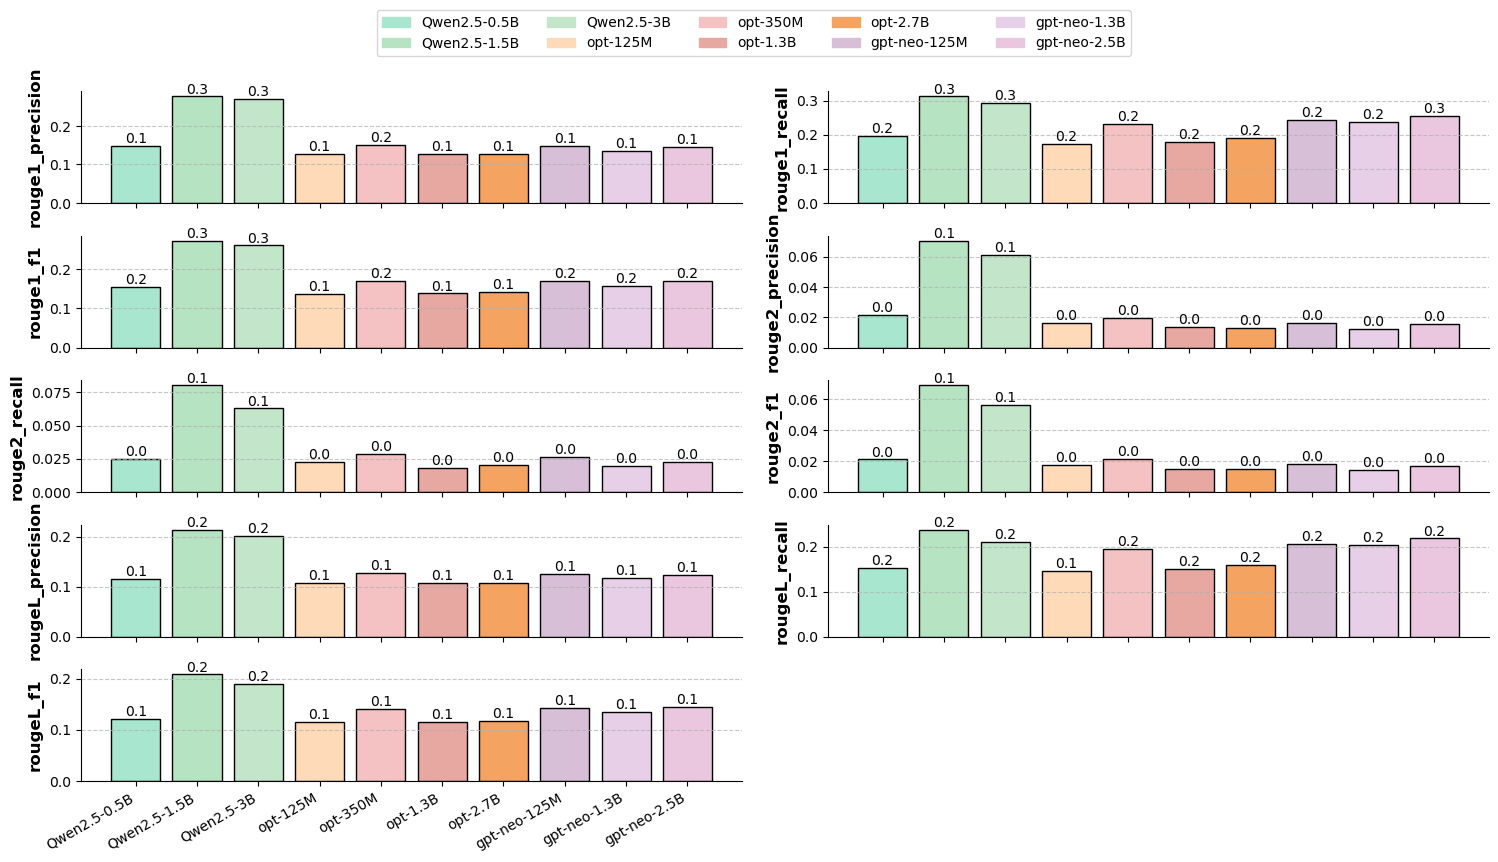

In [92]:

rows = 5  # Define number of rows
cols = (len(rouge_scores) + 1) // rows  # Automatically determine number of columns

# Create subplots with two rows
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharex=True)
axes = axes.flatten()  # Flatten axes for easy iteration
                        
# Plot each metric in a separate subplot
for i, ax in enumerate(axes):
    if i < len(rouge_scores):
        bars = ax.bar(models, rouge_metrics[i], color=colors, edgecolor="black")

        # Add labels above bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}', 
            ha='center', va='bottom', fontsize=10, color='black')

            # ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', 
            #         ha='center', va='bottom', fontsize=10, color='black')

        # Formatting
        ax.set_ylabel(rouge_scores[i], fontsize=12, weight="bold")
        #ax.set_title(f"Model Comparison - {min_k_prob[i]}", fontsize=14, weight="bold")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.yaxis.grid(True, linestyle="--", alpha=0.7)
        
        # Set x-axis labels individually
        ax.set_xticks(np.arange(len(models)))
        ax.set_xticklabels(models, rotation=30, ha="right")
    else:
        ax.set_visible(False)  # Hide extra subplots if not needed

# Add a legend for model colors
legend_patches = [mpatches.Patch(color=colors[i], label=models[i]) for i in range(len(models))]
fig.legend(handles=legend_patches, loc="upper center", bbox_to_anchor=(0.5, 1.08),
           ncol=min(len(models) // 2, 6), fontsize=10)

fig.subplots_adjust(top=0.85)
plt.tight_layout()
plt.savefig("Rouge_scores.png", dpi=300, bbox_inches='tight')
plt.show()


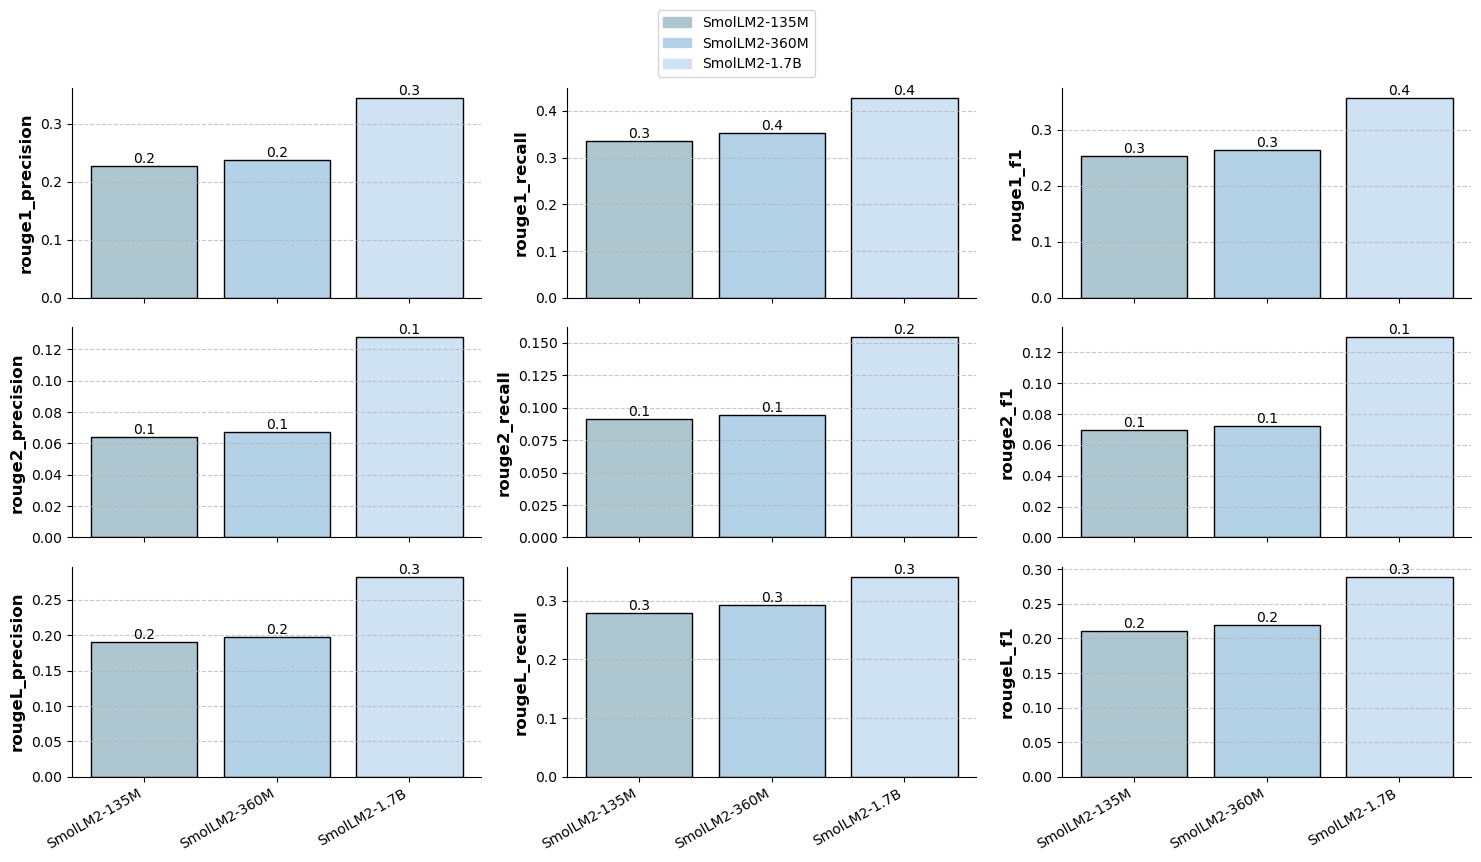

In [95]:
rows = 3  # Define number of rows
cols = (len(rouge_scores) + 1) // rows  # Automatically determine number of columns

# Create subplots with two rows
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharex=True)
axes = axes.flatten()  # Flatten axes for easy iteration
                        
# Plot each metric in a separate subplot
for i, ax in enumerate(axes):
    if i < len(rouge_scores):
        bars = ax.bar(smol_models, rouge_metrics_smollm[i], color=smol_colors, edgecolor="black")

        # Add labels above bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}', 
            ha='center', va='bottom', fontsize=10, color='black')

            # ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', 
            #         ha='center', va='bottom', fontsize=10, color='black')

        # Formatting
        ax.set_ylabel(rouge_scores[i], fontsize=12, weight="bold")
        #ax.set_title(f"Model Comparison - {min_k_prob[i]}", fontsize=14, weight="bold")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.yaxis.grid(True, linestyle="--", alpha=0.7)
        
        # Set x-axis labels individually
        ax.set_xticks(np.arange(len(smol_models)))
        ax.set_xticklabels(smol_models, rotation=30, ha="right")
    else:
        ax.set_visible(False)  # Hide extra subplots if not needed

# Add a legend for model colors
legend_patches = [mpatches.Patch(color=smol_colors[i], label=smol_models[i]) for i in range(len(smol_models))]
fig.legend(handles=legend_patches, loc="upper center", bbox_to_anchor=(0.5, 1.08),
           ncol=min(len(smol_models) // 2, 6), fontsize=10)

fig.subplots_adjust(top=0.85)
plt.tight_layout()
plt.savefig("Rouge_scores_SmolLM2.png", dpi=300, bbox_inches='tight')
plt.show()


In [56]:
cosine_metrics

[0.5515517186264306,
 0.5771247348173889,
 0.6813394640901004,
 0.37002667388054333,
 0.5736826300536884,
 0.5568674824249468]

/var/folders/lh/styx0ztd31n4sg68ksb_t4tm0000gn/T/ipykernel_2939/1971624472.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=30, ha="right")


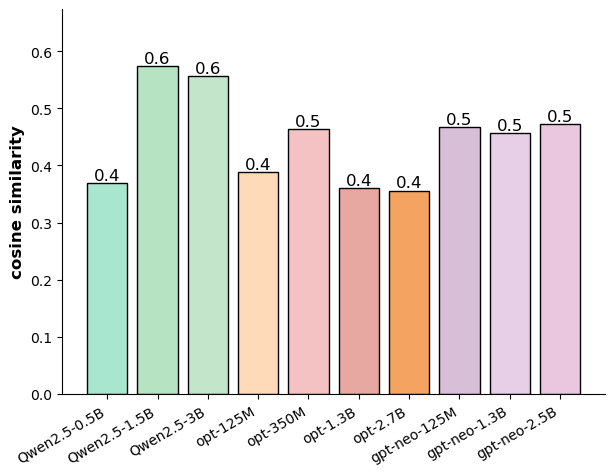

In [105]:

# Create bar plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(models, cosine_metrics, color=colors, edgecolor="black")

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}', 
            ha='center', va='bottom', fontsize=12, color='black')

# Formatting
ax.set_ylabel("cosine similarity", fontsize=12, weight="bold")
#ax.set_title("Model Performance Comparison", fontsize=14, weight="bold")
ax.set_ylim(0, max(cosine_metrics) + 0.1)  # Add some space above bars
ax.set_xticklabels(models, rotation=30, ha="right")

# Remove unnecessary spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig("cosine_similarity.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()


/var/folders/lh/styx0ztd31n4sg68ksb_t4tm0000gn/T/ipykernel_2939/508336873.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(smol_models, rotation=30, ha="right")


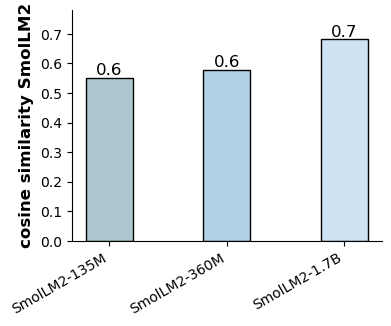

In [106]:
# Create bar plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(smol_models, cosine_metrics_smollm, width = 0.4, color=smol_colors, edgecolor="black")

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}', 
            ha='center', va='bottom', fontsize=12, color='black')

# Formatting
ax.set_ylabel("cosine similarity SmolLM2", fontsize=12, weight="bold")
#ax.set_title("cosine similarity for SmolLM2", fontsize=14, weight="bold")
ax.set_ylim(0, max(cosine_metrics_smollm) + 0.1)  # Add some space above bars
ax.set_xticklabels(smol_models, rotation=30, ha="right")

# Remove unnecessary spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig("cosine_similarity_SmolLM2.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

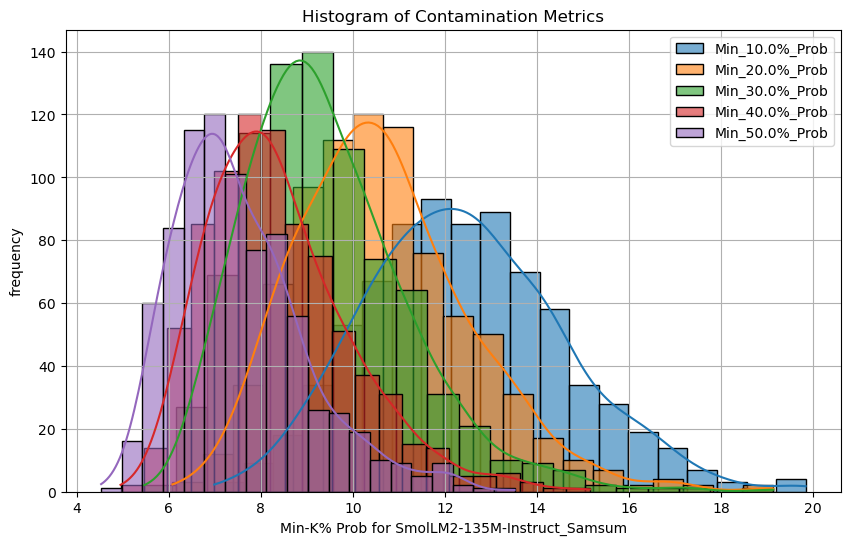

In [22]:

min_k_prob = ['Min_10.0%_Prob', 'Min_20.0%_Prob', 'Min_30.0%_Prob', 'Min_40.0%_Prob', 'Min_50.0%_Prob']
rouge_scores = ['rouge1', 'rouge2', 'rougeL']

# Plot histograms for Min-K% Prob
plt.figure(figsize=(10, 6))
for k in min_k_prob:
    sns.histplot(df[k], bins=20, kde=True, label=k, alpha=0.6)

# sns.histplot(df["cos_sim_scores"], bins=20, kde=True, label="Cosine Similarity", color="red", alpha=0.6)
# sns.histplot(df["rouge1"], bins=20, kde=True, label="ROUGE-1", color="green", alpha=0.6)

plt.xlabel("Min-K% Prob for SmolLM2-135M-Instruct_Samsum")
plt.ylabel("frequency")
plt.title("Histogram of Contamination Metrics")
plt.legend()
plt.grid(True)
plt.show()

/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

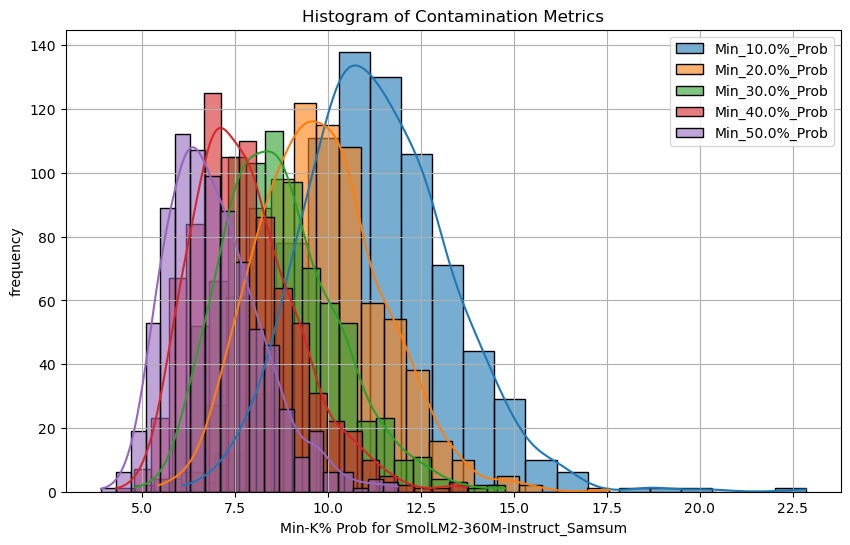

In [23]:
# Plot histograms for Min-K% Prob
plt.figure(figsize=(10, 6))
for k in min_k_prob:
    sns.histplot(df_360[k], bins=20, kde=True, label=k, alpha=0.6)

# sns.histplot(df["cos_sim_scores"], bins=20, kde=True, label="Cosine Similarity", color="red", alpha=0.6)
# sns.histplot(df["rouge1"], bins=20, kde=True, label="ROUGE-1", color="green", alpha=0.6)

plt.xlabel("Min-K% Prob for SmolLM2-360M-Instruct_Samsum")
plt.ylabel("frequency")
plt.title("Histogram of Contamination Metrics")
plt.legend()
plt.grid(True)
plt.show()

/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

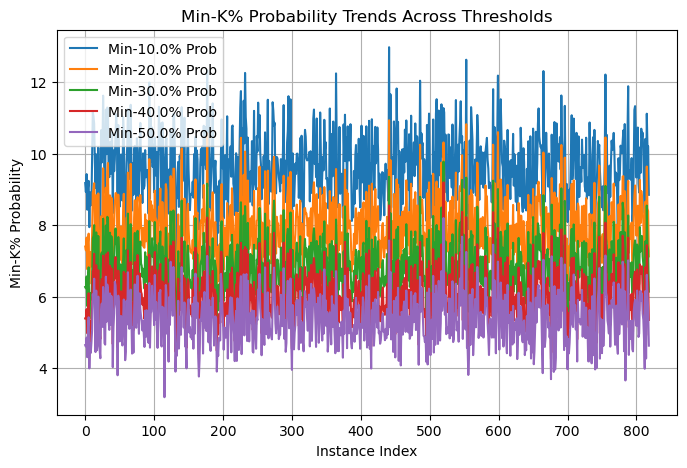

In [7]:
plt.figure(figsize=(8, 5))

for k in ["10.0", "20.0", "30.0", "40.0", "50.0"]:
    sns.lineplot(data=df, x=df.index, y=f"Min_{k}%_Prob", label=f"Min-{k}% Prob")

plt.xlabel("Instance Index")
plt.ylabel("Min-K% Probability")
plt.title("Min-K% Probability Trends Across Thresholds for SmolLM2-150M-Instruct_Samsum")
plt.legend()
plt.grid(True)
plt.show()

/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chenxinliu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

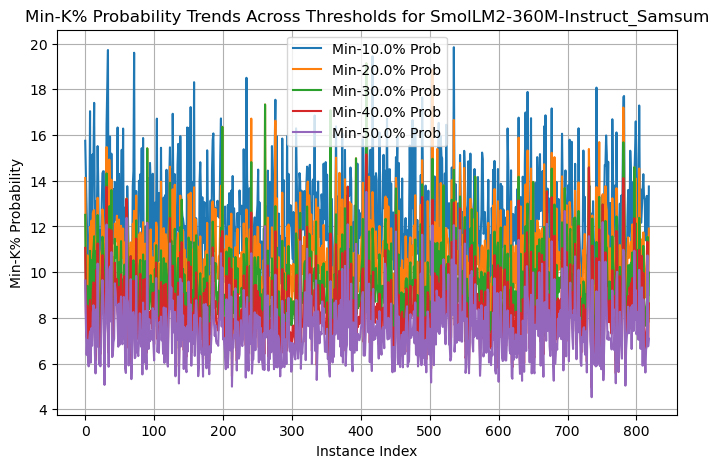

In [34]:
plt.figure(figsize=(8, 5))

for k in ["10.0", "20.0", "30.0", "40.0", "50.0"]:
    sns.lineplot(data=df, x=df.index, y=f"Min_{k}%_Prob", label=f"Min-{k}% Prob")

plt.xlabel("Instance Index")
plt.ylabel("Min-K% Probability")
plt.title("Min-K% Probability Trends Across Thresholds for SmolLM2-360M-Instruct_Samsum")
plt.legend()
plt.grid(True)
plt.show()

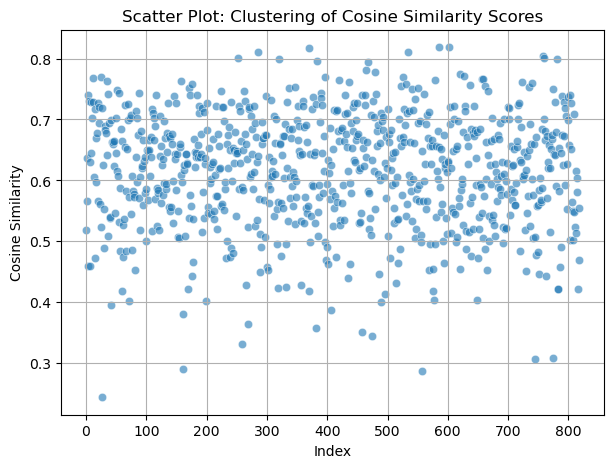

In [5]:
# Scatter plot to visualize clustering
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df.index, y=df["cos_sim_scores"], alpha=0.6)

plt.xlabel("Index")
plt.ylabel("Cosine Similarity")
plt.title("Scatter Plot: Clustering of Cosine Similarity Scores")
plt.grid(True)
plt.show()

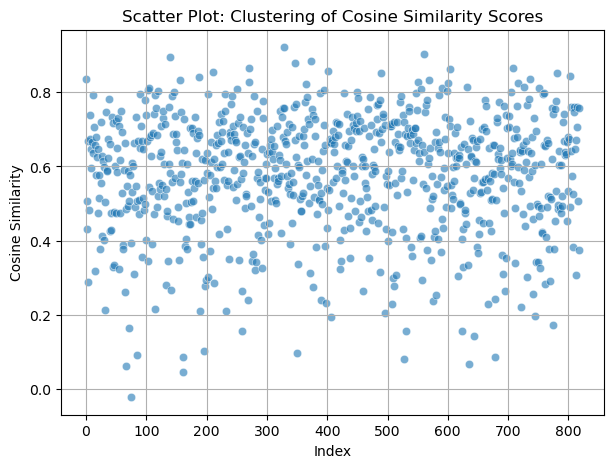

In [31]:
# Scatter plot to visualize clustering
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df_360.index, y=df_360["cos_sim_scores"], alpha=0.6)

plt.xlabel("Index")
plt.ylabel("Cosine Similarity")
plt.title("Scatter Plot: Clustering of Cosine Similarity Scores")
plt.grid(True)
plt.show()

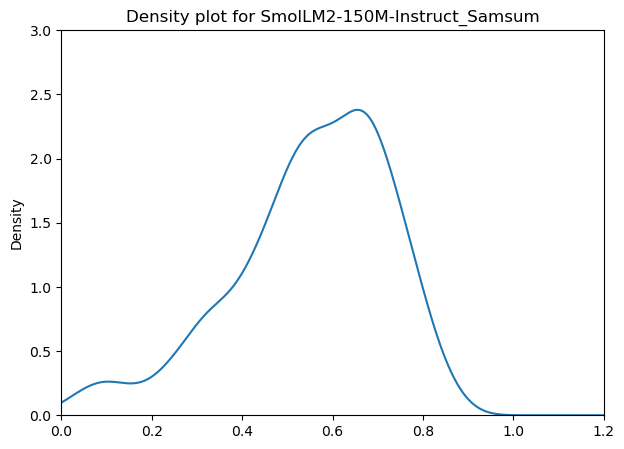

In [32]:
# Peek at cosine similarity density
plt.figure(figsize=(7, 5))
df["cos_sim_scores"].plot(kind="kde")
plt.xlim(0, 1.2)
plt.ylim(0, 3)
plt.title("Density plot for SmolLM2-150M-Instruct_Samsum")
plt.show()

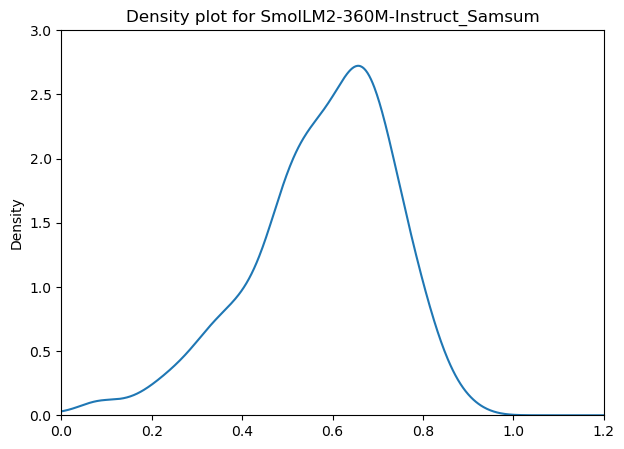

In [33]:
# Peek at cosine similarity density
plt.figure(figsize=(7, 5))
df_360["cos_sim_scores"].plot(kind="kde")
plt.xlim(0, 1.2)
plt.ylim(0, 3)
plt.title("Density plot for SmolLM2-360M-Instruct_Samsum")
plt.show()

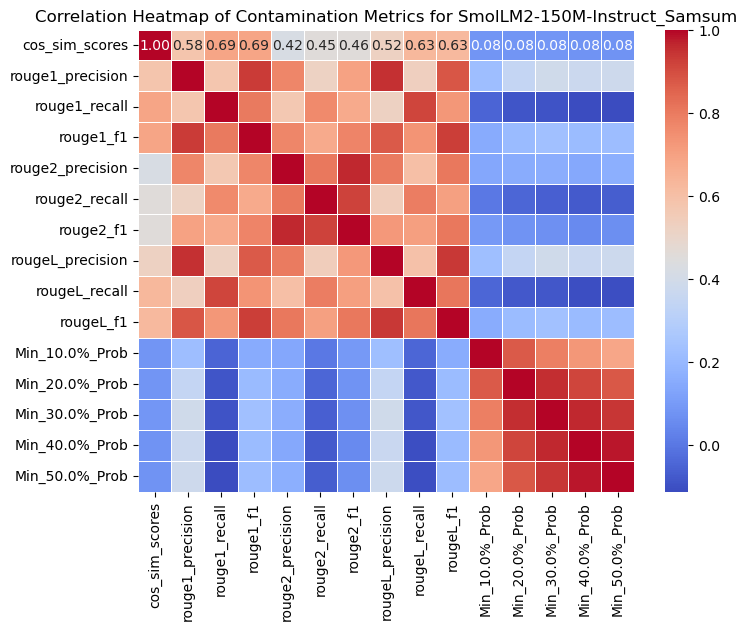

In [24]:
cols = [
    'cos_sim_scores', 'rouge1_precision', 'rouge1_recall', 'rouge1_f1', 
    'rouge2_precision', 'rouge2_recall', 'rouge2_f1', 
    'rougeL_precision', 'rougeL_recall', 'rougeL_f1',
    'Min_10.0%_Prob', 'Min_20.0%_Prob', 'Min_30.0%_Prob', 
    'Min_40.0%_Prob', 'Min_50.0%_Prob'
]

# Compute correlation matrix
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Contamination Metrics for SmolLM2-150M-Instruct_Samsum")
plt.show()

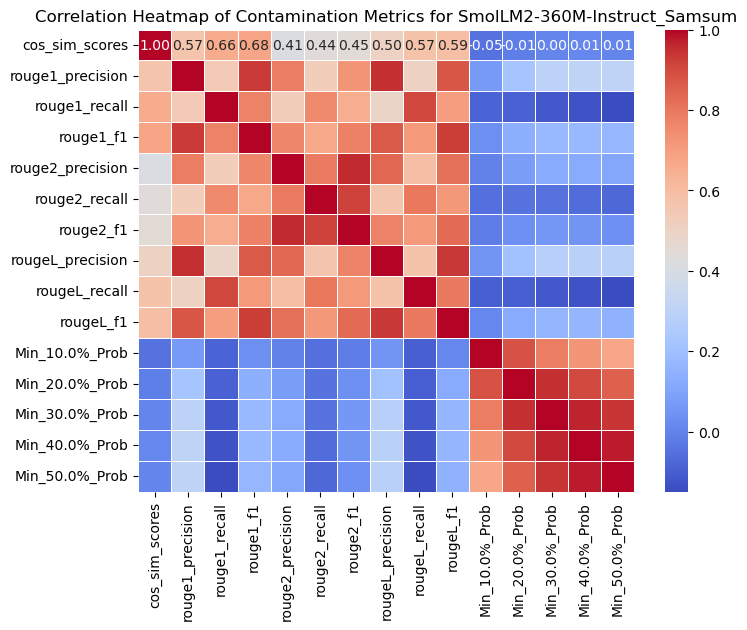

In [25]:
cols = [
    'cos_sim_scores', 'rouge1_precision', 'rouge1_recall', 'rouge1_f1', 
    'rouge2_precision', 'rouge2_recall', 'rouge2_f1', 
    'rougeL_precision', 'rougeL_recall', 'rougeL_f1',
    'Min_10.0%_Prob', 'Min_20.0%_Prob', 'Min_30.0%_Prob', 
    'Min_40.0%_Prob', 'Min_50.0%_Prob'
]

# Compute correlation matrix
corr_matrix = df_360[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Contamination Metrics for SmolLM2-360M-Instruct_Samsum")
plt.show()